In [1]:
# Imports
import pandas as pd
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [3]:
data = pd.read_csv("..\data\mturk_experiment_2.csv",encoding="unicode_escape")
sentences = data["Sentence"]

In [176]:
vectoriser = CountVectorizer(min_df=20, max_df=0.2, stop_words='english',token_pattern="(?u)\\b\\w\\w\\w+\\b")
X = vectoriser.fit_transform(sentences)
corpus = gensim.matutils.Sparse2Corpus(X,documents_columns=False)
id_map = dict((v,k) for k,v in vectoriser.vocabulary_.items())
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map,passes=2,random_state=5,num_topics=10,workers=2)

In [177]:
topic = []

for doc in sentences:
    X = vectoriser.transform([doc])
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    output = list(ldamodel[corpus])[0]
    topics = sorted(output, key=lambda x: x[1], reverse=True)
    topic.append(topics[0][0])

In [178]:
data["Topic"] = topic

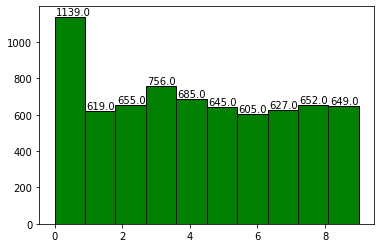

In [179]:
arr = plt.hist(data["Topic"],edgecolor="black",color="green")
for i in range(10):
    plt.text(arr[1][i]+0.04,arr[0][i]+10,str(arr[0][i]))